#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of visualizations of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your research questions. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, document carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) functions.
    * Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

# Can we make a change on climate change?
#### EPA1333 Final Assignment

#### Angga Irawan (4516974), Priadi Teguh Wibowo



### Introduction

Global temperature rise, warming oceans, shrinking ice sheets, sea level rise are some evidences that the climate is changing. The suspected main cause of this phenomena is the greenhouse effect generated by the certain type of gases such as, Nitrous oxide, Carbon dioxide, and Methane.    

Data analysis can help us better understand how the climate has changed, why, to make predictions for the future years, and to evaluate measures on how to suppress these changes. In this assignment you receive climate change data from World Bank, and are expected to perform an original and non-trivial analysis using Python.

### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

Import standard library to prepare the reading and loading process of the data.

In [251]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the world bank data as a dataframe.

In [252]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[-1]], 1)

# display the head of dataframe
wb.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


The world bank data consists of data for 57 years (1960-2016) of 264 countries with 80 indicators for each country. These data could be utilized as the raw features of our model. 

Read the additional csv file which contains the metadata of the counries on the main world bank data.

In [253]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[-1]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


We also have to include the another csv file containing the metadata of the indicator on the main world bank data. 

In [256]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[-1]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides additional data beside the world bank data such as, temperature, precipitation and basin level data. It can be directly accessed from Python using requests. The detail is available here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. ISO aplha3 code to select a country: https://unstats.un.org/unsd/methodology/m49/. Change 'tas' with 'pr' to obtain the precipitation of a country instead.


In [257]:
import requests
indonesia = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/IDN')
idn = indonesia.json()
idn[:5]

[{'data': 25.897385, 'year': 1901},
 {'data': 25.891254, 'year': 1902},
 {'data': 25.89029, 'year': 1903},
 {'data': 25.81223, 'year': 1904},
 {'data': 25.89114, 'year': 1905}]

# Additional Data

We need additional data from other resources to assist the previous obtained data as the additional feature, a potential label for the classification, or a ground truth for the prediction.

## $CO_{2}$ Levels

In [231]:
df_co2 = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', 
                     delim_whitespace=True, 
                     engine='python',
                     skiprows=72,
                     names = ['year', 'months','decimal date', 'average', 'interpolated', 'trend', '#days']
                    )

In [232]:
df_co2.head()

,year,months,decimal date,average,interpolated,trend,#days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


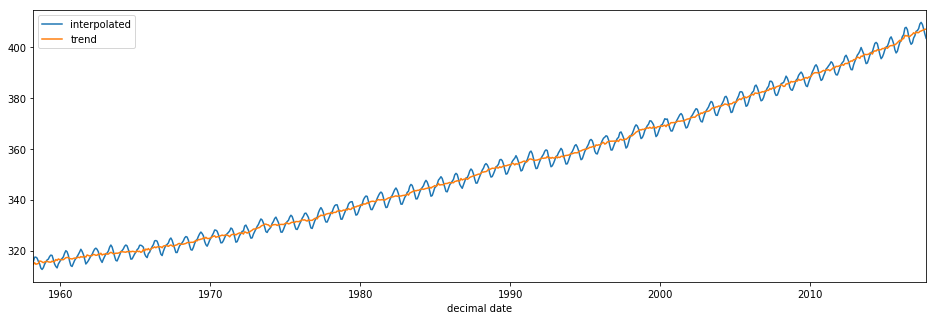

In [235]:
values = ['interpolated', 'trend']
df_co2[values].plot(x = df_co2['decimal date'],figsize=(16,5))

## Global Temperature Anomaly

In [258]:
df_tempe = pd.read_csv(
    'https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt', 
    sep="     ", 
    names=['year', 'annual mean', '5 year mean'],
    index_col = 'year',
    engine ='python')

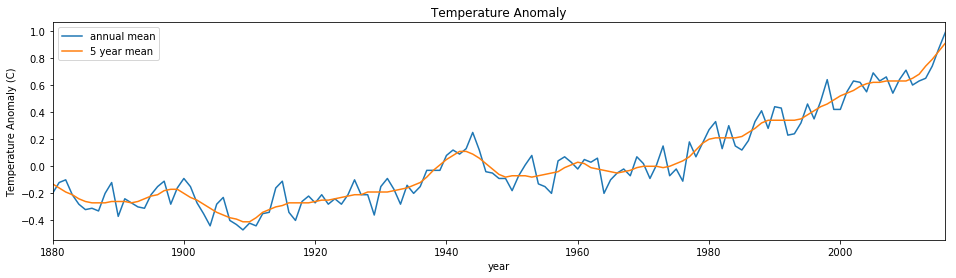

In [260]:
df_tempe.plot(figsize = (16,4))
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly')

In [261]:
# slice the range of year, make suitable with the world bank data (provided since 1960)
df_tempe_since_1960 = df_tempe[80:]
df_tempe_since_1960.head()

,annual mean,5 year mean
year,,
1960,-0.02,0.03
1961,0.05,0.02
1962,0.03,-0.01
1963,0.06,-0.02
1964,-0.20,-0.03


## Climate Change Performance Index

In [262]:
# load label Climate Change Performance Index
# the data were extracted from https://germanwatch.org/en/download/16484.pdf
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y.head()

# rename the CCPI column to Country Name, so it could be 'merge' on this column name
country_class_y.columns = ['Country Name', 'Label']
label_int = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})
country_class_y.head()

,Country Name,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good


# Data Cleaning and Preprocessing

Before jump in to the analysis of the data, we need to clean and preprocess the data first. 

## World Bank Data Interpolation

In [249]:
# create column of years of the world bank data
years_column = wb.columns.values[range(4,61)]
years_column

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [250]:
# copy the content of the dataframe (to avoid copying the reference) for the interpolation
wb_prep = pd.DataFrame()
wb_prep = wb[years_column]
# reset the column (year) to integer
wb_prep.columns = range(0,57)
# display the dataframe
wb_prep.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [113]:
# interpolate the data in row direction also in both direction within range limit
wb_interpolated = wb_prep.interpolate(method='krogh',limit_direction='both',limit=56,axis=1)

In [114]:
# show the interpolation results
wb_interpolated.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [115]:
# create a new dataframe to avoid overwriting the original dataframe
wb_inter = pd.DataFrame()
wb_inter = wb[wb.columns.values]

# replace wb_inter annual value with the interpolated one
wb_inter[list(wb.columns.values[range(4,61)])] = wb_interpolated[list(range(0,57))]

# now we have interpolated world bank data
wb_inter.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,2.752600e+04,2.814100e+04,2.853200e+04,2.876100e+04,2.892400e+04,2.908200e+04,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931e+00,2.209658e+00,1.379868e+00,7.994038e-01,5.651398e-01,5.447726e-01,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037e+00,2.238144e+00,1.409622e+00,8.324526e-01,5.926490e-01,5.734682e-01,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,8.636205e+20,4.671991e+20,2.487142e+20,1.301754e+20,6.692089e+19,3.375478e+19,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,-496676.799834


## Filter the world bank data with CCPI countries

### CCPI results

New dataframe which contains only the data from countries mention in CCPI document.

In [267]:
# create a df of countries from CCPI results countries
df_ccpi = pd.DataFrame()
for country in country_class_y['Country Name']:
    # filter the CCPI countries
    
    # not interpolated
    df1 = wb[wb['Country Name'] == country]
    
    # take it from the interpolated one
    df1 = wb_inter[wb_inter['Country Name'] == country]

    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi[:8]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,-8.781107e+09,-7.283146e+09,-6.016658e+09,-4.949738e+09,-4.054324e+09,-3.305806e+09,...,0.000000e+00,0.000000e+00,8.373016e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.616667e+00,6.521429e+01
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01


### Saved Indicator

Check the data for each country which the entire years of a indicator are missing.

In [266]:
# saved indicator
list_indi = []
for c, i in enumerate(range(0,4480,80)):
    print(c, df_ccpi['Country Name'][i],df_ccpi[i:i+80].isnull().any(axis=1).sum())
    for i in df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]:
        # print(i)
        list_indi.append(i)     

0 France 4
1 Sweden 3
2 United Kingdom 4
3 Cyprus 6
4 Luxembourg 6
5 Malta 8
6 Portugal 4
7 Belgium 4
8 Denmark 4
9 Switzerland 3
10 Latvia 5
11 Italy 2
12 Croatia 4
13 Romania 2
14 Lithuania 5
15 India 1
16 Ireland 5
17 Indonesia 1
18 Egypt, Arab Rep. 4
19 Czech Republic 10
20 Greece 3
21 Slovak Republic 12
22 Netherlands 3
23 Mexico 2
24 Germany 2
25 Slovenia 5
26 Finland 3
27 South Africa 2
28 Spain 4
29 Hungary 11
30 Poland 3
31 Argentina 2
32 Bulgaria 2
33 Norway 4
34 Iceland 8
35 Brazil 2
36 Austria 12
37 Thailand 2
38 United States 3
39 Malaysia 2
40 Ukraine 3
41 New Zealand 5
42 Algeria 1
43 China 2
44 Belarus 3
45 Estonia 4
46 Turkey 3
47 Russian Federation 4
48 Singapore 12
49 Canada 2
50 Iran, Islamic Rep. 2
51 Australia 2
52 Korea, Rep. 3
53 Kazakhstan 12
54 Japan 2
55 Saudi Arabia 6


Filter the data frame so it only consists of the indicators which are complete for the entire year (1960-2016).

In [268]:
df_ccpi_clean = pd.DataFrame()

# initialize the flag of saved indicator
array_flag = np.ones((len(df_ccpi)), dtype=bool)

# transfom it to series
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))

# filter the indicator
for indi in sorted(set(list_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))

# filter the df
df_ccpi_clean = df_ccpi[series_flag]

# reset the index year -> integer 0
df_ccpi_clean_reset = df_ccpi_clean.reset_index(drop=True)

# fill missing value with zero
df_ccpi_clean_reset = df_ccpi_clean_reset.fillna(0)
df_ccpi_clean_reset.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
6,France,FRA,"Improved water source, urban (% of urban popul...",SH.H2O.SAFE.UR.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
7,France,FRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,2.850000e+01,2.700000e+01,2.570000e+01,2.450000e+01,2.340000e+01,2.230000e+01,...,4.400000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.300000e+00,4.400000e+00,4.400000e+00,4.300000e+00,-1.062059e+14


As we could see from dataframe above, we do not have missing value anymore.

## Data not from CCPI (skip it you want to use CCPI data)

We could also use the entire countries instead too make our features matrix bigger (not necessarily better).

In [83]:
# create a dataframe for each year
dict_df_temp = {}
range_tempe = range(1960, 2017)
for year in range_tempe:
    year = str(year)
    dict_df_temp[year] = pd.DataFrame()
    # print(year)
    # interpolated?
    dict_df_temp[year] = wb[['Country Name', year]]
    # dict_df_temp[year] = wb_inter[['Country Name', year]]
    dict_df_temp[year] = dict_df_temp[year].fillna(0)
    
dict_df_temp[year].head()

,Country Name,2016
0,Aruba,41.304000
1,Aruba,43296.000000
2,Aruba,-0.080806
3,Aruba,104822.000000
4,Aruba,0.459929


In [84]:
# features matrix

X_tempe = pd.DataFrame()

for year in range_tempe:
    year = str(year)
    # axis 1 = concat to the right column of the original df
    X_tempe = pd.concat([X_tempe,dict_df_temp[year][year]], ignore_index=True, axis=1) 
    # print(dict_df_temp[year][year])
    
X_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


# Training Set

## Feature Matrix

In [124]:
# non CCPI
# X_tempe_train = X_tempe.T

# CCPI
X_tempe_train = df_ccpi_clean_reset.iloc[:,4:61].T
X_tempe_train = X_tempe_train.reset_index(drop=True)

dataset_tempe = X_tempe_train[X_tempe_train.columns.values]
dataset_tempe.head(20)


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,61.880,28968650.0,2.424503,46814237.0,1.229610,100.0,100.0,28.5,-3.835518e+19,-27.0,...,0.0,0.0,100.0,1.525756e+23,59.0,0.454484,9770.0,6.618970e+13,6.014367e+15,1.292662e+20
1,62.607,29703735.0,2.505858,47444751.0,1.337853,100.0,100.0,27.0,-2.823966e+18,-26.0,...,0.0,0.0,100.0,2.540421e+22,59.0,0.454484,9770.0,5.303090e-01,4.008485e+01,8.617000e+05
2,63.489,30550684.0,2.811428,48119649.0,1.412470,100.0,100.0,25.7,-1.589262e+17,-25.0,...,0.0,0.0,100.0,3.833342e+21,59.0,0.454484,9770.0,5.396127e-01,4.009415e+01,8.619000e+05
3,64.702,31576957.0,3.304057,48803680.0,1.411512,100.0,100.0,24.5,-6.079276e+15,-24.0,...,0.0,0.0,100.0,5.162396e+20,59.0,0.454484,9770.0,5.489164e-01,4.010439e+01,8.621200e+05
4,65.898,32586168.0,3.146026,49449403.0,1.314427,100.0,100.0,23.4,-1.185959e+14,-23.0,...,0.0,0.0,100.0,6.080973e+19,59.0,0.454484,9770.0,5.582200e-01,4.011788e+01,8.624100e+05
5,67.071,33551445.0,2.919203,50023774.0,1.154839,100.0,100.0,22.3,8.947808e+00,-22.0,...,0.0,0.0,100.0,6.094277e+18,59.0,0.454484,9770.0,5.675237e-01,4.012765e+01,8.626200e+05
6,68.225,34459572.0,2.670688,50508717.0,0.964756,100.0,100.0,21.4,8.736554e+00,-21.0,...,0.0,0.0,100.0,4.991119e+17,59.0,0.454484,9770.0,5.768274e-01,4.013788e+01,8.628400e+05
7,69.357,35313433.0,2.447662,50915456.0,0.802060,100.0,100.0,20.6,8.668568e+00,-20.0,...,0.0,0.0,100.0,3.133400e+16,59.0,0.454484,9770.0,5.861310e-01,4.014718e+01,8.630400e+05
8,70.238,36015275.0,1.967972,51276054.0,0.705733,100.0,100.0,19.9,8.342099e+00,-19.0,...,0.0,0.0,100.0,1.341179e+15,59.0,0.454484,9770.0,6.000865e-01,4.016393e+01,8.634000e+05
9,70.648,36481398.0,1.285933,51638260.0,0.703901,100.0,100.0,19.1,7.717706e+00,-18.0,...,0.0,0.0,100.0,2.937357e+13,59.0,0.454484,9770.0,6.140420e-01,4.018021e+01,8.637500e+05


## Train Target

In [125]:
# y_tempe_train = df_tempe_since_1960[['annual mean']]
y_tempe_train = df_tempe_since_1960[['5 year mean']]
y_tempe_train = y_tempe_train.reset_index(drop=True)
y_tempe_train.head()

,5 year mean
0,0.03
1,0.02
2,-0.01
3,-0.02
4,-0.03


### Concat the target to the main matrix

In [126]:
dataset_tempe['target'] = y_tempe_train 
dataset_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,target
0,61.880,28968650.0,2.424503,46814237.0,1.229610,100.0,100.0,28.5,-3.835518e+19,-27.0,...,0.0,100.0,1.525756e+23,59.0,0.454484,9770.0,6.618970e+13,6.014367e+15,1.292662e+20,0.03
1,62.607,29703735.0,2.505858,47444751.0,1.337853,100.0,100.0,27.0,-2.823966e+18,-26.0,...,0.0,100.0,2.540421e+22,59.0,0.454484,9770.0,5.303090e-01,4.008485e+01,8.617000e+05,0.02
2,63.489,30550684.0,2.811428,48119649.0,1.412470,100.0,100.0,25.7,-1.589262e+17,-25.0,...,0.0,100.0,3.833342e+21,59.0,0.454484,9770.0,5.396127e-01,4.009415e+01,8.619000e+05,-0.01
3,64.702,31576957.0,3.304057,48803680.0,1.411512,100.0,100.0,24.5,-6.079276e+15,-24.0,...,0.0,100.0,5.162396e+20,59.0,0.454484,9770.0,5.489164e-01,4.010439e+01,8.621200e+05,-0.02
4,65.898,32586168.0,3.146026,49449403.0,1.314427,100.0,100.0,23.4,-1.185959e+14,-23.0,...,0.0,100.0,6.080973e+19,59.0,0.454484,9770.0,5.582200e-01,4.011788e+01,8.624100e+05,-0.03


## Generating the Model (Linear Regression)

In [270]:
from sklearn.linear_model import LinearRegression
LR_tempe = LinearRegression(fit_intercept=True)
LR_tempe.fit(X_tempe_train, y_tempe_train)


## Predict the anomaly temperature

In [ ]:
dataset_tempe['predicted'] = LR_tempe.predict(X_tempe_train)
dataset_tempe.head()

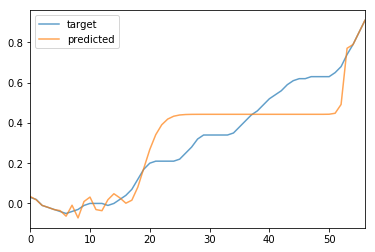

In [130]:
# krough
dataset_tempe[['target', 'predicted']].plot(alpha=0.7);

## Analysis of the parameter of the model

In [272]:
params_tempe = pd.Series(LR_tempe.coef_[0], index=X_tempe_train.columns.values)
params_tempe.head()

0   -4.240050e-20
1    8.297688e-21
2    2.441707e-20
3    6.884637e-21
4    3.501386e-21
dtype: float64

In [273]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([LR_tempe.fit(*resample(X_tempe_train, y_tempe_train)).coef_ for i in range(1000)], 0)

In [198]:
params_tempe.nlargest(5)

713     8.522125e-19
1800    7.628884e-19
1777    7.272091e-19
2953    6.546643e-19
1001    5.115627e-19
dtype: float64

In [197]:
params_tempe.nsmallest(5)

553    -3.778596e-18
881    -2.069211e-18
217    -3.144103e-19
2113   -2.924581e-19
1231   -2.794195e-19
dtype: float64

In [195]:
# from dataframe
n = 5
params_tempe.nlargest(n)
for i in range(1,n+1):
    index = params_tempe.nlargest(n).index[i-1]
    print(i,df_ccpi_clean_reset.loc[index][0],'\t',df_ccpi_clean_reset.loc[index][2])
    


1 Croatia 	 Electricity production from renewable sources, excluding hydroelectric (kWh)
2 Bulgaria 	 Agriculture, value added (% of GDP)
3 Argentina 	 Electricity production from renewable sources, excluding hydroelectric (kWh)
4 Korea, Rep. 	 Electricity production from renewable sources, excluding hydroelectric (kWh)
5 Indonesia 	 Foreign direct investment, net inflows (% of GDP)


In [196]:
# from dataframe
n = 5
params_tempe.nsmallest(n)
for i in range(1,n+1):
    index = params_tempe.nsmallest(n).index[i-1]
    print(i,df_ccpi_clean_reset.loc[index][0],'\t',df_ccpi_clean_reset.loc[index][2])

1 Switzerland 	 Foreign direct investment, net inflows (% of GDP)
2 India 	 Electricity production from renewable sources, excluding hydroelectric (kWh)
3 Cyprus 	 Foreign direct investment, net inflows (% of GDP)
4 Thailand 	 Electricity production from renewable sources, excluding hydroelectric (kWh)
5 Slovak Republic 	 Agricultural land (sq. km)


In [130]:
print(pd.DataFrame({'effect': params_tempe*10**20, 'error': err[0]*10**20}))

            effect        error
0          202.383      43314.1
1          -4.2142      2882.69
2           0.1765      9868.91
3         0.240496      2667.46
4       0.00960744      366.422
5          -2.2101      5809.66
6        -0.945674      1663.41
7          88.4258      8493.18
8          8.89871       2231.7
9         0.986603      7682.13
10       -0.138517      5463.21
11        -7.88738      7584.79
12     0.000122062      253.583
13     0.000298803      3208.46
14     4.32143e-06      67.9274
15     4.78779e-05      751.127
16     0.000143195      181.611
17     0.000157423      96.5368
18     7.83727e-06      62.1155
19     -0.00125432       88.669
20     3.65574e-05      52.1147
21     5.25384e-07      10.2576
22     7.20176e-05      27.1516
23    -0.000209813       82.809
24     1.96724e-06    0.0365893
25     0.000101753    0.0175742
26     1.04944e-05    0.0313229
27     -4.1653e-05    0.0158254
28     0.000130894    0.0080479
29      9.1957e-09    0.0049984
...     

# Additional Learning (?)

###  PCA

In [274]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)

NameError: name 'Xtrain' is not defined

In [ ]:
from sklearn.decomposition import RandomizedPCA

Rpca = PCA(svd_solver='randomized').fit(Xtrain)
plt.plot(np.cumsum(Rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)


In [ ]:
pca = PCA(2)
Rpca = PCA(4, svd_solver='randomized')
projected = Rpca.fit_transform(Xtrain)
print(Xtrain.shape)
print(projected.shape)

In [ ]:
Xtrain = projected

In [ ]:
ytrain.head()

In [ ]:
ytrain_color = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
c= ytrain_color, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
X_new = pca.inverse_transform(projected)
X_new.shape

In [ ]:
(X_new > 324000).all(axis = 0).sum()

In [ ]:
22, 532

In [ ]:
X_new.shape
56*557/(X_new > 1000000).sum()
Xtrain.shape

#  RF

In [ ]:
Xtrain.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.75)
RF = RandomForestClassifier(random_state=0)


In [ ]:
RF.get_params().keys()

In [ ]:
param_grid_rf = {'n_estimators': [1, 10, 100, 1000, 2000, 5000]}
grid_rf = GridSearchCV(RF, param_grid_rf)


In [ ]:
%time grid_rf.fit(Xtrain, ytrain)
print(grid_rf.best_params_)

In [ ]:
RF = grid_rf.best_estimator_


In [ ]:
RF.fit(Xrf_train, yrf_train)
yrf_pred = RF.predict(Xrf_test)


In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, yrf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yrf_pred, yrf_test))

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(RF, Xtrain, ytrain, cv=4).mean()